<a href="https://colab.research.google.com/github/sarahatef01/chocolate-sales-analysis/blob/main/chocolate_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


1094 sales have been done this year with an average of 162 boxes per sale and median 135 boxes per sale, while the maximum was 709 boxes

In [ ]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [ ]:
# converting the ammount into float after removing the $ sign
df['Amount']=df['Amount'].replace('[\$,]', '', regex=True).astype(float)
# convert date to a dateobject
df['Date']=pd.to_datetime(df['Date'], format='mixed',dayfirst=True)

In [ ]:
#checking countries for spelling mistakes, all "unique" values are truly unique
df['Country'].unique()
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

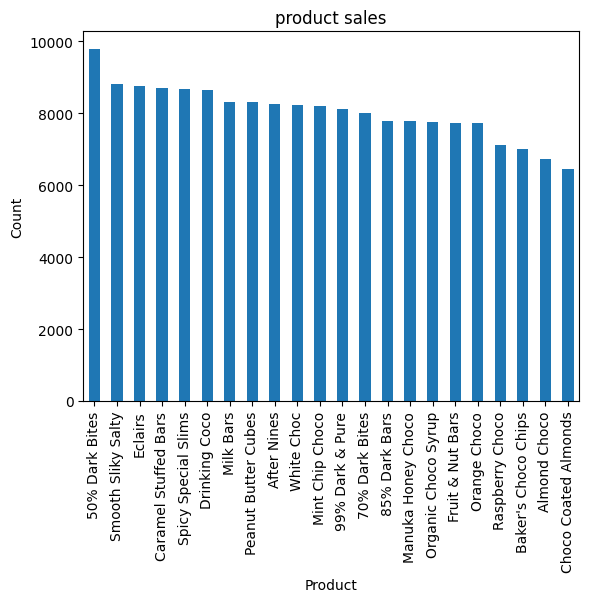

In [ ]:
#most selling products
productsales = df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=False)
productsales.plot(kind="bar")
plt.title('product sales')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

In [ ]:
print("best selling product is",productsales.idxmax(),"with",productsales.max(),"boxes sold")
print("worst selling product is",productsales.idxmin(),"with",productsales.min(),"boxes sold")


best selling product is 50% Dark Bites with 9792 boxes sold
worst selling product is Choco Coated Almonds with 6464 boxes sold


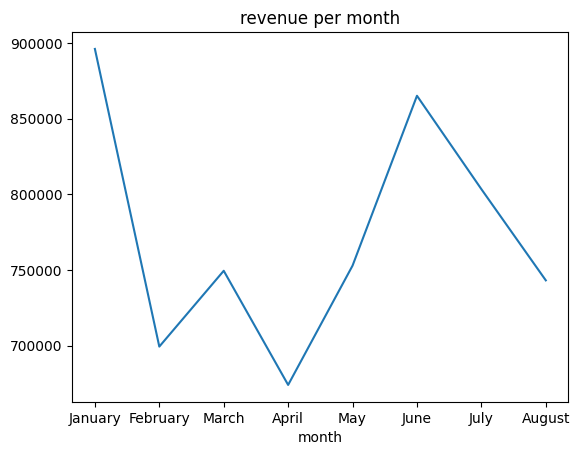

In [ ]:
df["month"]=df["Date"].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('month')['Amount'].sum().reindex(month_order)
monthly_sales.plot(kind='line')
plt.title('revenue per month')
plt.show()

In [ ]:
salesperson = df['Sales Person'].value_counts().sort_values(ascending=False)
top_seller = salesperson.idxmax()
print("most sales performed by",top_seller,"with",salesperson[top_seller],"sales")
averagesales = salesperson.mean()
print("the average number of sales per employee",averagesales)


most sales performed by Kelci Walkden with 54 sales
the average number of sales per employee 43.76


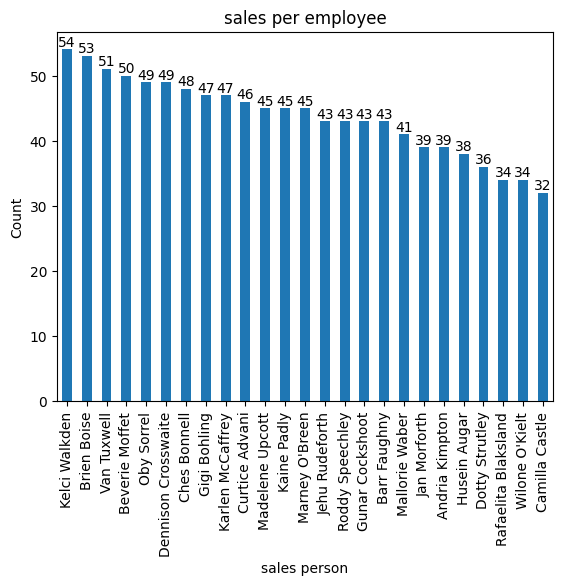

In [ ]:
salesperson.plot(kind="bar").bar_label(container=plt.gca().containers[0])
plt.title('sales per employee')
plt.xlabel('sales person')
plt.ylabel('Count')
plt.show()


In [ ]:
salespersonrevenue = df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False)
print("most revenue ")
print(salespersonrevenue)

most revenue 
Sales Person
Ches Bonnell           320901.0
Oby Sorrel             316645.0
Madelene Upcott        316099.0
Brien Boise            312816.0
Kelci Walkden          311710.0
Van Tuxwell            303149.0
Dennison Crosswaite    291669.0
Beverie Moffet         278922.0
Kaine Padly            266490.0
Marney O'Breen         259742.0
Barr Faughny           258713.0
Roddy Speechley        251062.0
Gunar Cockshoot        238483.0
Gigi Bohling           232666.0
Karlen McCaffrey       223895.0
Jehu Rudeforth         220976.0
Jan Morforth           219667.0
Curtice Advani         216461.0
Rafaelita Blaksland    210245.0
Husein Augar           205212.0
Andria Kimpton         201747.0
Mallorie Waber         200592.0
Camilla Castle         196616.0
Dotty Strutley         190624.0
Wilone O'Kielt         138523.0
Name: Amount, dtype: float64


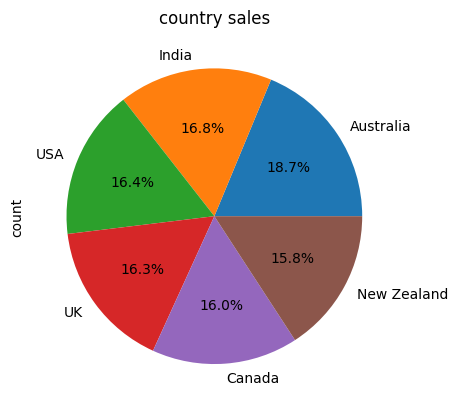

In [ ]:
countries = df['Country'].value_counts().sort_values(ascending=False)
countries.plot(kind="pie",autopct='%1.1f%%')
plt.title('country sales')
plt.show()
